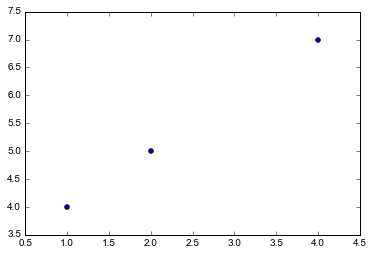

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial']
plt.scatter([1,2,4], [4,5,7])

In [ ]:
plt.savefig

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial']
plt.scatter([1,2,4], [4,5,7])

In [3]:
plt.rcParams['font.sans-serif']

[u'Arial']

/frazer01/home/cdeboever/software/anaconda/envs/cie/lib/python2.7/site-packages/matplotlib/font_manager.py:1287: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


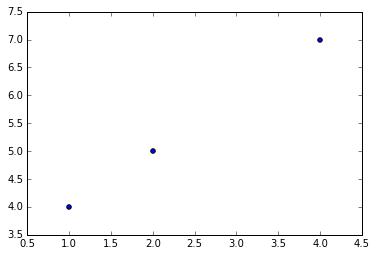

In [5]:
plt.scatter([1,2,4], [4,5,7])

In [10]:
import os
import re
import urllib2

import pandas as pd
import pybedtools as pbt

fn = os.path.join('/publicdata/roadmap_15_state_20151104/EIDlegend.txt')
roadmap_ids = pd.read_table(fn, squeeze=True, index_col=0, header=None)

url = ('http://egg2.wustl.edu/roadmap/data/byFileType'
'/peaks/consolidated/narrowPeak/')
website = urllib2.urlopen(url)
html = website.read()
files = re.findall('href="(.*\.gz)"', html)
lines = [x for x in roadmap_ids.index if 'iPS' in roadmap_ids[x]]
files = [x for x in files if x.split('-')[0] in lines]
files = [x for x in files if 'hotspot' not in x]
urls = ['http://egg2.wustl.edu/roadmap/data/byFileType/peaks/consolidated/narrowPeak/{}'.format(n)
        for n in files]

def read_gzipped_text_url(url):
    """Read a gzipped text file from a URL and return 
    contents as a string."""
    import urllib2
    import zlib
    from StringIO import StringIO

    opener = urllib2.build_opener() 
    request = urllib2.Request(url)
    request.add_header('Accept-encoding', 'gzip')
    respond = opener.open(request)
    compressedData = respond.read()
    respond.close()
    opener.close()
    compressedDataBuf = StringIO(compressedData)
    d = zlib.decompressobj(16+zlib.MAX_WBITS)
    buffer = compressedDataBuf.read(1024)
    #saveFile = open('/tmp/test.txt', "wb")
    s = []
    while buffer:
        s.append(d.decompress(buffer))
        buffer = compressedDataBuf.read(1024)
    s = ''.join(s)
    return s

s = read_gzipped_text_url(urls[0])
bt = pbt.BedTool(s, from_string=True)

In [ ]:
r = sm.sandbox.stats.multicomp.multipletests(pvalues, method='fdr_bh')
#pvalues_bh = pd.Series(r[1], index=pvalues.index)
#sum(pvalues_bh < 0.05)

In [17]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [14]:
fns = glob.glob('/projects/CARDIPS/pipeline/ATACseq/sample/*/logs/*macs2.err')
fragments = []
for fn in fns:
    with open(fn) as f:
        lines = [x.strip() for x in f.readlines()]
        fragments.append(int([x for x in lines if '#1 fragment size' in x][0].split()[-1]))

In [19]:
pd.Series(fragments).median()

83.0

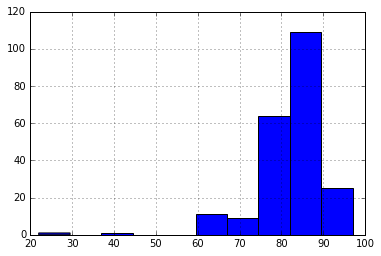

In [18]:
pd.Series(fragments).hist()

In [34]:
import os
import subprocess

In [37]:
import time

In [53]:
fns = glob.glob('/projects/CARDIPS/pipeline/ATACseq/sample/*/alignment/*_sorted_rmdup.bam')
count = 1
for fn in fns[2:]:
    dy = os.path.split(fn)[0]
    name = fn.split('/')[-3]
    sh = os.path.join(os.path.split(dy)[0], 'sh', '{}_qsort.sh'.format(name))
    out = os.path.splitext(fn)[0] + '_query_sorted.bam'
    if not os.path.exists(sh):
        lines = '#!/bin/bash\n\n'
        lines += '#$ -N job_{}_qsort\n'.format(name)
        lines += '#$ -l h_vmem=1.5G\n'
        lines += '#$ -pe smp 4\n'
        lines += '#$ -S /bin/bash\n'
        lines += '#$ -o /projects/CARDIPS/pipeline/ATACseq/sample/{0}/logs/job_{0}_qsort.out\n'.format(name)
        lines += '#$ -e /projects/CARDIPS/pipeline/ATACseq/sample/{0}/logs/job_{0}_qsort.err\n\n'.format(name)
        lines += ('# This script runs query sorting for the rmdup bam because an earlier version of the pipeline'
                  ' didn\'t have this command.\n\n')
        lines += 'module load cardips\n'
        lines += 'source activate cardips\n'
        lines += ('sambamba sort -m 4GB -t 4 -n \\\n\t--tmpdir {} \\\n\t{} \\\n\t-o {}\n'.format(dy, fn, out))
        with open(sh, 'w') as f:
            f.write(lines)
        subprocess.check_call('qsub {}'.format(sh), shell=True)
        count += 1

In [ ]:
#!/bin/bash

#$ -N job_1071bbc3-1c0c-423d-a3b8-3912d4eefa84_alignment
#$ -l h_vmem=4.0G
#$ -pe smp 8
#$ -S /bin/bash
#$ -o /projects/CARDIPS/pipeline/ATACseq/sample/1071bbc3-1c0c-423d-a3b8-3912d4eefa84/logs/job_1071bbc3-1c0c-423d-a3b8-3912d4eefa84_alignment.out
#$ -e /projects/CARDIPS/pipeline/ATACseq/sample/1071bbc3-1c0c-423d-a3b8-3912d4eefa84/logs/job_1071bbc3-1c0c-423d-a3b8-3912d4eefa84_alignment.err

# Git repository version:
# 143ac01998ad4100bdde2f3fa1ba1b9384744f6a (HEAD -> new_cluster, origin/new_cluster) Bug fix for removing duplicates

module load cardips

source activate cardips



In [29]:
c

'sambamba sort -m 4GB -t 4 -n --tmpdir /projects/CARDIPS/pipeline/ATACseq/sample/472b28d7-565a-4fbd-81d0-88aec1c67669/alignment /projects/CARDIPS/pipeline/ATACseq/sample/472b28d7-565a-4fbd-81d0-88aec1c67669/alignment/472b28d7-565a-4fbd-81d0-88aec1c67669_sorted_rmdup.bam -o /projects/CARDIPS/pipeline/ATACseq/sample/472b28d7-565a-4fbd-81d0-88aec1c67669/alignment/472b28d7-565a-4fbd-81d0-88aec1c67669_sorted_rmdup_query_sorted.bam'

In [60]:
dys = glob.glob('/projects/CARDIPS/pipeline/ATACseq/sample/*')
dys = [x for x in dys if '1071bbc3-1c0c-423d-a3b8-3912d4eefa84' not in x]
dys = [x for x in dys if 'old' not in x]
dys = [x for x in dys if 'SRR' not in x]

In [63]:
dys[0]

'/projects/CARDIPS/pipeline/ATACseq/sample/4d75c71d-a7d6-4280-9248-36ac6712ff14'

In [64]:
for dy in dys:
    !rm -r {'{}/*counts'.format(dy)}
    !rm -r {'{}/sh/*counts*'.format(dy)}
    !rm -r {'{}/logs/*counts*'.format(dy)}

^C


In [66]:
3 + #

SyntaxError: invalid syntax (<ipython-input-66-76dd9541e76f>, line 1)

In [2]:
import pandas as pd

In [16]:
df = pd.read_table('/projects/T2D/pipeline/ATACseq/combined_files/star_logs.tsv', index_col=0)

In [17]:
df[['Number of input reads', 'Uniquely mapped reads %']]

,Number of input reads,Uniquely mapped reads %
A0001_ISL_ATAC_S38,52169201,82.71
A0001_ISL_ATAC_S37,11013598,81.95
A0001_ISL_ATAC_combined,103042423,82.27
A0001_ISL_ATAC_S10,39859624,81.78


In [9]:
import glob
import os

In [18]:
df = pd.read_table('/projects/T2D/pipeline/ATACseq/combined_files/picard_metrics.tsv', index_col=0)

In [20]:
df[['MEDIAN_INSERT_SIZE', 'PERCENT_DUPLICATION']]

,MEDIAN_INSERT_SIZE,PERCENT_DUPLICATION
A0001_ISL_ATAC_S38,189,0.164157
A0001_ISL_ATAC_S37,192,0.081011
A0001_ISL_ATAC_combined,184,0.149780
A0001_ISL_ATAC_S10,175,0.114720


In [23]:
df = pd.read_table('/projects/T2D/pipeline/ATACseq/combined_files/num_peaks.tsv', index_col=0, header=None)

In [24]:
df

,1
0,
A0001_ISL_ATAC_S38,26600
A0001_ISL_ATAC_S37,11953
A0001_ISL_ATAC_combined,34784
A0001_ISL_ATAC_S10,21086
